<a href="https://colab.research.google.com/github/JinMizar/ds3001_final_project/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS3001 Final Project
## Wine Quality Dataset




*Team Member: Jinhong Zhao, Tong Zhou, Hanna Svenson*


In [20]:
! git clone https://github.com/JinMizar/ds3001_final_project.git

fatal: destination path 'ds3001_final_project' already exists and is not an empty directory.


## Overview of the Wine Quality Dataset

[This dataset](https://https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data) contains 1143 samples of Portuguese red wines, with each observation making up one row. There are 12 columns total, which is comprised of one column for the wine id, 11 different wine characteristics (including citric acid, chlorides, sulphates, pH, alchohol), and one output variable for the quality of the quality of wine rated from 0 to 10. The dataset will be used to make a predictive model on the quality of wine.

This data has applications both for producers and consumers of wine. If this model can successfully identify the characteristics make a good quality wine, then wine producers looking to improve their wine can have guidance on how to optimize their wine production processes. As a consumer, this knowledge can also help with making more informed decisions when purchasing wines.

As this dataset was sourced from Kaggle, it is fairly clean, so we have generated some initial plots and tables.

## Resolved or Expected Challenges:

### Too many variables
*   One of the challenges we have encountered is there are too many variables in the dataset. We downloaded our dataset from Kaggle, which is already fairly clean. We also check the credibility based on the Kaggle rate. However, it is a large dataset with quite a lot of variables in the dataset. We have to filter out the ones that are related to our topic while making sure there are no missing values in that dataset. Our focus is on wine quality, thus the quality column is one of the key variables in our dataset. We then plotted the rest of the variables with quality to demonstrate the correlation between them. By plotting the line graphs again quality, we can have a better visualization and understanding of the dataset. So that we can decide what are the variables we will be pulling out and do some more EDA.

### Data Imbalance
*   Another challenge we may experience is how well will this dataset work for our project. In order to get a well-organized and well-collected dataset for our topic, we have to make sure the wine quality variable has reasonable values. We don't want the data to be overrepresented while others are underrepresented, which means as much as possible, we don't want to see an unequal distribution of categories within the data. If some values have many more samples compared to others in the wine quality dataset, we are concerned if it will cause issues in model training and prediction. This kind of imbalance can lead to models that are biased toward the majority category, which may make it challenging to predict important outcomes such as excellent quality wines.

### Outliers and Noise
*   Although the dataset is fairly clean, there may still be outliers or noise in the data that could affect model performance. Addressing these outliers through preprocessing steps such as normalization, transformation, or removing extreme values could be necessary.

These are some of the anticipated or already tackled challenges in the early stage of the project from this wine quality dataset.

## Data Visualization and Plot Analysis

We print out a list of the dataset's columns, such as fixed acidity, volatile acidity, citric acid, chlorides, sulphates, pH, alcohol, and the target variable quality. This helps identify which variables are available for analysis.



In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ds3001_final_project/data/WineQT.csv',low_memory=False)

In [22]:
print(df.columns.tolist())
print(df.describe(), '/n')
df.head()

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [23]:
df = df.rename(columns={'fixed acidity':'fix_acid',
                        'volatile acidity':'vol_acid',
                        'citric acid':'cit_acid',
                        'residual sugar':'res_sugar',
                        'free sulfur dioxide':'free_SO2',
                        'total sulfur dioxide':'tot_SO2',
                        'density':'dens',
                        'sulphates':'sulph',
                        'alcohol':'alc',
                        'quality':'qual'})


Boxplots help visualize the distribution of wine quality ratings. It helps to understand the distribution of the target variable, wine quality, to detect any imbalance or outliers.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='qual'>

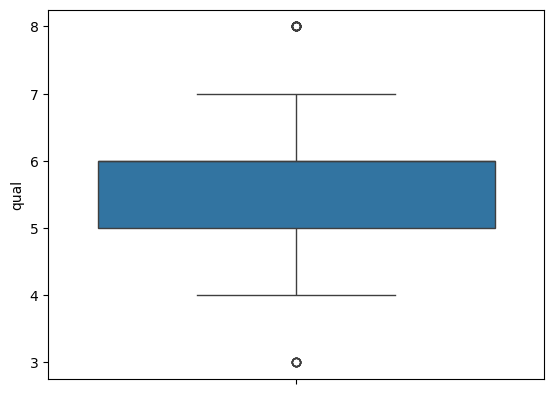

In [24]:
sns.boxplot(df['qual'])

<Axes: xlabel='qual', ylabel='Density'>

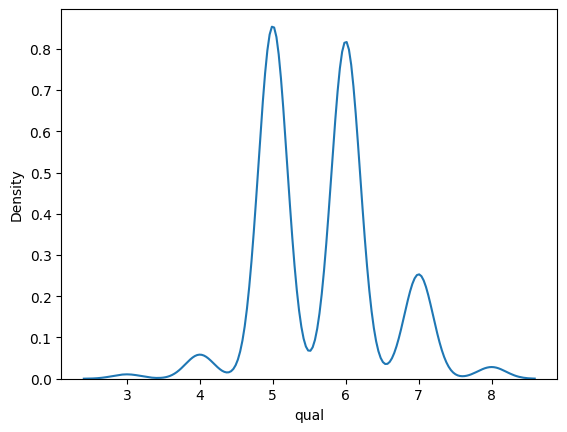

In [25]:
sns.kdeplot(data=df,x='qual')

<Axes: xlabel='qual', ylabel='fix_acid'>

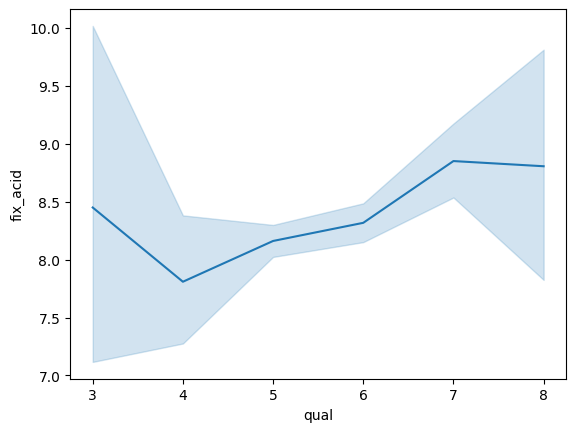

In [26]:
sns.lineplot(data=df,x='qual',y='fix_acid')

<Axes: xlabel='qual', ylabel='vol_acid'>

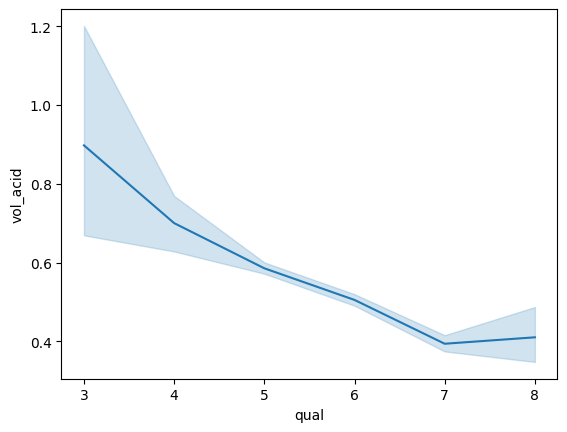

In [27]:
sns.lineplot(data=df,x='qual',y='vol_acid')

<Axes: xlabel='qual', ylabel='cit_acid'>

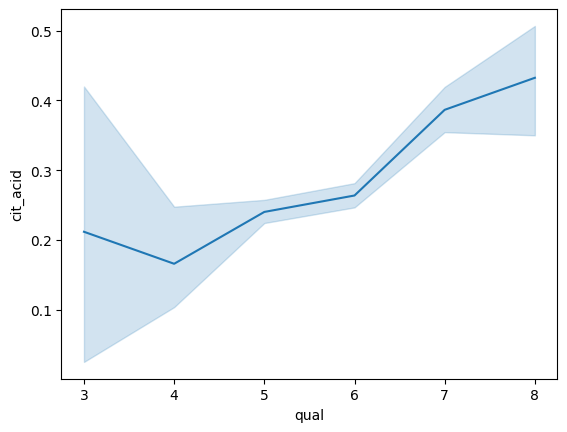

In [28]:
sns.lineplot(data=df,x='qual',y='cit_acid')

<Axes: xlabel='qual', ylabel='res_sugar'>

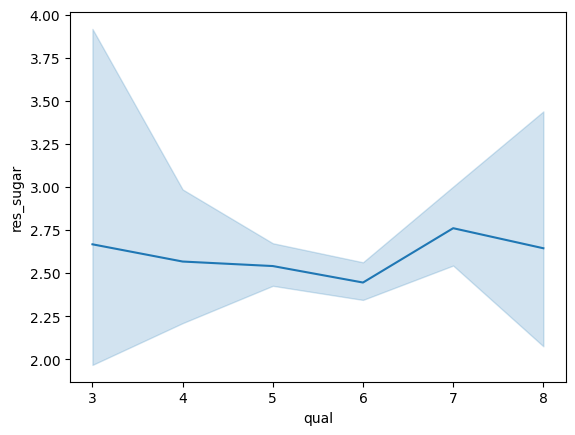

In [29]:
sns.lineplot(data=df,x='qual',y='res_sugar')

<Axes: xlabel='qual', ylabel='chlorides'>

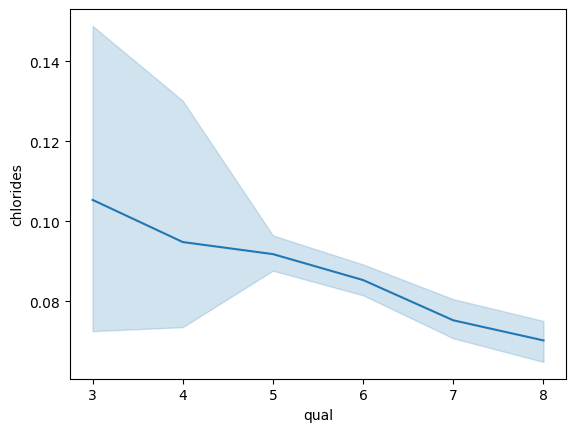

In [30]:
sns.lineplot(data=df,x='qual',y='chlorides')

<Axes: xlabel='qual', ylabel='free_SO2'>

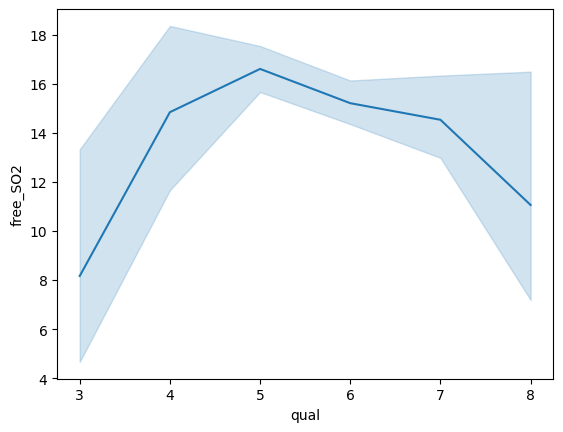

In [31]:
sns.lineplot(data=df,x='qual',y='free_SO2')

<Axes: xlabel='qual', ylabel='tot_SO2'>

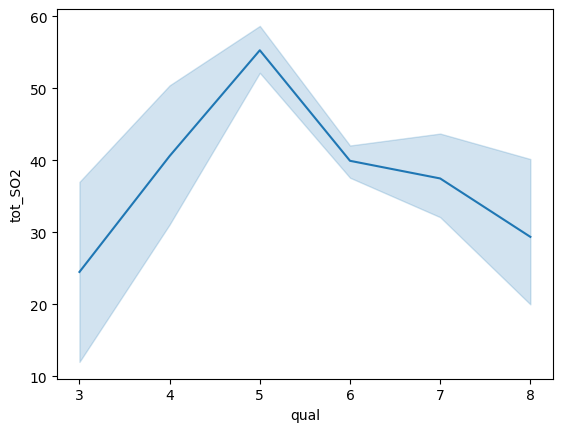

In [32]:
sns.lineplot(data=df,x='qual',y='tot_SO2')

<Axes: xlabel='qual', ylabel='dens'>

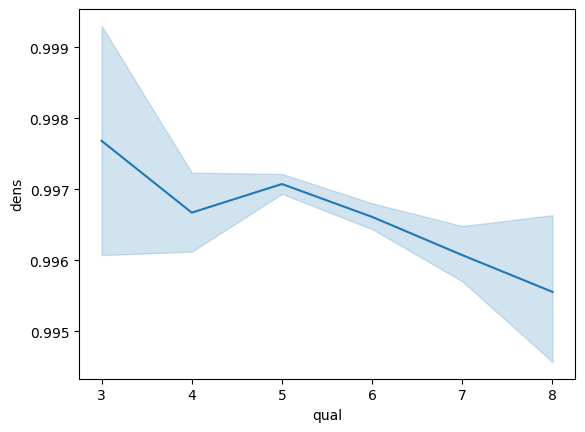

In [33]:
sns.lineplot(data=df,x='qual',y='dens')

<Axes: xlabel='qual', ylabel='pH'>

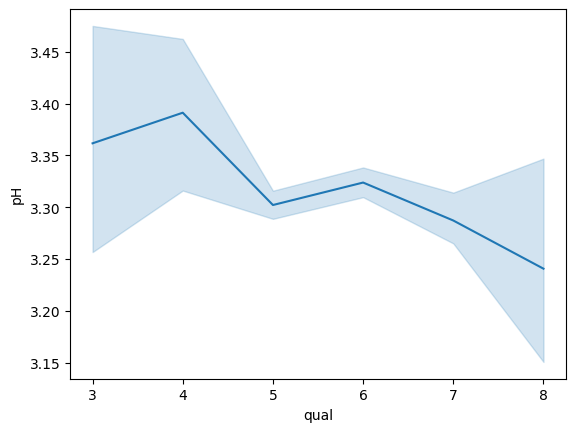

In [34]:
sns.lineplot(data=df,x='qual',y='pH')

<Axes: xlabel='qual', ylabel='sulph'>

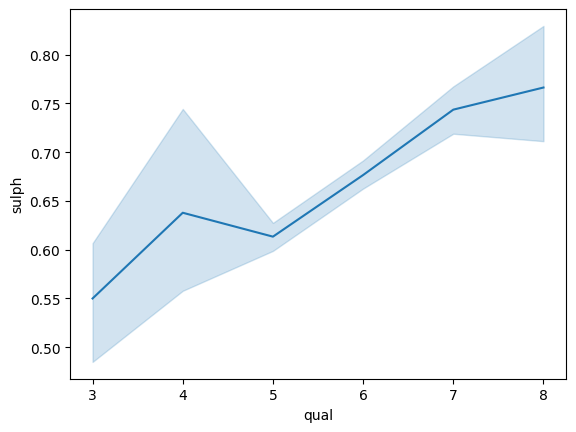

In [35]:
sns.lineplot(data=df,x='qual',y='sulph')

<Axes: xlabel='qual', ylabel='alc'>

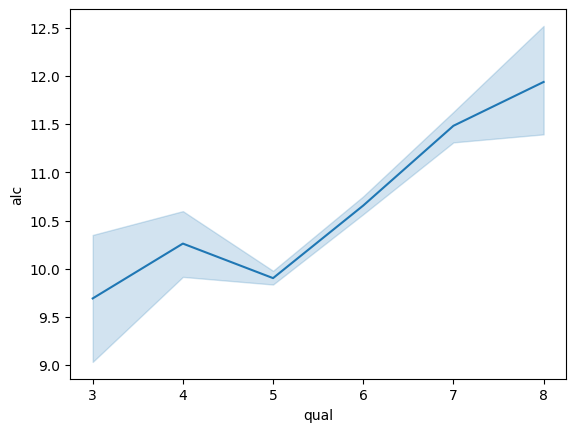

In [36]:
sns.lineplot(data=df,x='qual',y='alc')